<a href="https://colab.research.google.com/github/NoahGV/AA_PRACTICA_FinalCapstone_GRUPO_B5/blob/main/PracticaFinal_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRÁCTICA FINAL: Capstone**

 GRUPO 5: Jonás García Vallejo, Lydia Sánchez-Cano Sánchez y Noah García Villanueva

# PROBLEMA PROPUESTO:

## **Detección de discursos de odio y lenguaje ofensivo en Twitter**

## **¿Qué datos vamos a utilizar?**

Este conjunto de datos, denominado hade_speech_offensive, es una colección meticulosamente seleccionada de tweets anotados con el propósito específico de detectar discursos de odio y lenguaje ofensivo. El conjunto de datos consta principalmente de tweets en inglés y está diseñado para entrenar modelos o algoritmos de aprendizaje automático en la tarea de detección de discursos de odio. Cabe señalar que el conjunto de datos no se ha dividido en varios subconjuntos.

El conjunto de datos incluye varias columnas que proporcionan información valiosa para comprender la clasificación de cada tweet.

El recuento de columnas representa el número total de anotaciones proporcionadas para cada tweet, mientras que **hate_speech_count** significa cuántas anotaciones clasificaron un tweet en particular como discurso de odio. Por otro lado, **ofensiva_language_count** indica la cantidad de anotaciones que categorizan un tweet como que contiene lenguaje ofensivo. Además, **none_count** indica cuántas anotaciones no identificaron un tweet como discurso de odio ni lenguaje ofensivo.

## **Descripción del conjunto de datos:**

El conjunto de datos se presenta en un formato de archivo CSV denominado 'train.csv'.


Consiste en tweets comentados con información sobre su clasificación como discurso de odio, lenguaje ofensivo o ninguno de los dos.


Cada fila representa un tweet junto con las anotaciones correspondientes proporcionadas por múltiples anotadores.


Las columnas principales que serán esenciales para su análisis son:

- **count** (número total de anotaciones)

- **hate_speech_count** (número de anotaciones que clasifican un tweet como discurso de odio)
- **ofensiva_language_count** (número de anotaciones que clasifican un tweet como lenguaje ofensivo)
- **none_count** (número de anotaciones que no clasifican un tweet como incitación al odio ni como lenguaje ofensivo).

## **Recomendaciones para el preprocesamiento:**


Antes de entrenar modelos o algoritmos de aprendizaje automático en este conjunto de datos, se recomienda aplicar técnicas de preprocesamiento estándar, como eliminar URL, nombres de usuario/identificadores, caracteres especiales/signos de puntuación, eliminación de palabras vacías, tokenización, derivación/lematización, etc., según sus requisitos de análisis.

## **Objetivo del trabajo**

Nuestro objetivo del trabajo es realizar una clasificación binaria de los comentarios de Twiter para poder detectar a través de redes neuronales si se trata de un discurso de odio o no.

Para ello, nos vamos a basar en el ejemplo de la Clasificación_binaria_crítica_películas que hemos estudiado a lo largo de la asignatura de Aprendizaje Automático.

Leemos el archivo:

In [ ]:
import pandas as pd
# Lee el archivo CSV
df = pd.read_csv('train.csv')
df.head()

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


Veamos si nuestra base de datos contiene valores nulos, por si necesita que realicemos una limpieza.

In [ ]:
df.isnull().sum()

count                       0
hate_speech_count           0
offensive_language_count    0
neither_count               0
class                       0
tweet                       0
dtype: int64

No contiene valores nulos, por lo que podemos seguir con el preprocesamiento.

Para empezar realizaremos el preprocesamiento de nuestra base de datos para poder utilizarlo sin probelma alguno.

¿Qué hacemos en el preprocesamiento?

- **Eliminar URL**:
Las URL generalmente no aportan información útil para la clasificación y pueden eliminarse.

- **Eliminar nombres de usuario/identificadores**:
Los nombres de usuario no suelen contribuir a la clasificación y pueden eliminarse.

- **Eliminar caracteres especiales/signos de puntuación**:
Elimina caracteres especiales y signos de puntuación que no aporten información valiosa para la clasificación.

- **Convertir a minúsculas**:
Convierte todo el texto a minúsculas para que las palabras en mayúsculas y minúsculas se traten de la misma manera.

- **Eliminar palabras vacías (stopwords)**:
Elimina palabras comunes que no aportan mucho significado al texto (como "el", "es", "y", etc.).

- **Tokenización**:
Divide el texto en palabras individuales (tokens) para facilitar el análisis.

- **Lematización o derivación (stemming)**:
Reduce las palabras a sus formas base para disminuir la dimensionalidad del conjunto de datos. La lematización generalmente es más sofisticada que el stemming y busca reducir las palabras a sus formas base de manera más precisa.

- **Eliminamos los RT**

In [ ]:
import re
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
# Descargar recursos de NLTK (solo necesario la primera vez)
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
# Función de preprocesamiento
def preprocess_text(text):
    # Eliminar URL
    text = re.sub(r'http\S+', '', text)
    # Eliminar nombres de usuario/identificadores
    text = re.sub(r'@[^\s]+', '', text)
    # Eliminar caracteres especiales y signos de puntuación
    text = re.sub('[^A-Za-z0-9]+', ' ', text)
    # Convertir a minúsculas
    text = text.lower()
    # Tokenización
    tokens = word_tokenize(text)
    # Eliminar palabras vacías
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lematización
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Unir tokens en un string
    processed_text = ' '.join(tokens)
    return processed_text
# Aplicar preprocesamiento a la columna 'tweet'
df['processed_tweet'] = df['tweet'].apply(preprocess_text)
# Eliminar RT al principio del tweet
df['processed_tweet'] = df['processed_tweet'].replace(to_replace=r'^rt[\s]+', value='', regex=True)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Mostramos los datos una vez preprocesados:

In [ ]:
df#.head()

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet,processed_tweet
0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,woman complain cleaning house amp man always t...
1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,boy dat cold tyga dwn bad cuffin dat hoe 1st p...
2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,dawg rt ever fuck bitch start cry confused shit
3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,look like tranny
4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,shit hear might true might faker bitch told ya...
...,...,...,...,...,...,...,...
24778,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,muthaf lie 8220 right tl trash 8230 mine bible...
24779,3,0,1,2,2,"you've gone and broke the wrong heart baby, an...",gone broke wrong heart baby drove redneck crazy
24780,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...,young buck wan na eat dat nigguh like aint fuc...
24781,6,0,6,0,1,youu got wild bitches tellin you lies,youu got wild bitch tellin lie


Ahora tenemos nuestra base de datos sin URL, sin RT, sin palabras vacías, etc...

En la columna "hate_speech_count" tenemos el número de anotaciones que clasifican un tweet como discurso de odio

Primero quiero saber que tipo de variable es:

In [ ]:
# Imprime el tipo de variables en la columna "hate_speech_count"
print(df['hate_speech_count'].dtype)

int64


Y después la cantidad de valores únicos de dicha columna:

In [ ]:
# Cuenta la cantidad de valores únicos en la columna 'hate_speech_count'
cantidad_valores_unicos = df['hate_speech_count'].nunique()
print(f"La cantidad de valores únicos en la columna 'hate_speech_count' es: {cantidad_valores_unicos}")

La cantidad de valores únicos en la columna 'hate_speech_count' es: 8


Finalmente queremos saber la frecuencia de cada valor:

In [ ]:
# Muestra la frecuencia de cada valor único en la columna 'hate_speech_count'
frecuencia_valores = df['hate_speech_count'].value_counts()
print(f"Frecuencia de cada valor único en la columna 'hate_speech_count':\n{frecuencia_valores}")

Frecuencia de cada valor único en la columna 'hate_speech_count':
0    19790
1     3419
2     1251
3      287
4       21
5        7
6        5
7        3
Name: hate_speech_count, dtype: int64


¿Por qué queremos saber esto?

Queremos etiquetar los tweet para saber si son ofensivos o no.

0 -> no serán ofensivos

1 -> serán ofensivos

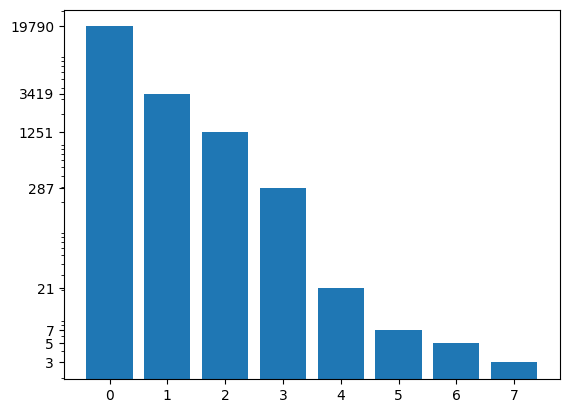

In [ ]:
import matplotlib.pyplot as plt

# Extrae los valores y frecuencias para graficarlo
valores = frecuencia_valores.index
frecuencias = frecuencia_valores.values

# Crea un histograma para ver la distrubución de los valores
plt.bar(valores, frecuencias)

# Ajusta la escala del eje y a logarítmica para que se muestren todas las barras
plt.yscale('log')

# Configura manualmente las etiquetas del eje 'y' marcando las frecuencias
yticks = frecuencias
yticklabels = [str(val) for val in yticks]
plt.yticks(yticks, yticklabels)

plt.show()

Debido a la distribución de las anotaciones, diremos que de 0 - 1 serán comentarios no ofensivos (0) y de 2 - 7 serán comentarios ofensivos (1). Separandolo en base a la cantidad de datos agrupados. Además, hay que tener en cuenta que estamos en la varible "hate_speech_count" por lo que el  nivel de odio será mayor que en la varible "offensive_language_count"

In [ ]:
# Cuenta la cantidad de valores únicos en la columna 'offensive_language_count'
cantidad_valores_unicos2 = df['offensive_language_count'].nunique()
print(f"La cantidad de valores únicos en la columna 'offensive_language_count' es: {cantidad_valores_unicos2}")

La cantidad de valores únicos en la columna 'offensive_language_count' es: 10


In [ ]:
# Muestra la frecuencia de cada valor único en la columna 'hate_speech_count'
frecuencia_valores2 = df['offensive_language_count'].value_counts()
print(f"Frecuencia de cada valor único en la columna 'offensive_language_count':\n{frecuencia_valores2}")

Frecuencia de cada valor único en la columna 'offensive_language_count':
3    13383
2     4246
0     3475
1     2066
6      857
5      369
4      251
9       66
8       37
7       33
Name: offensive_language_count, dtype: int64


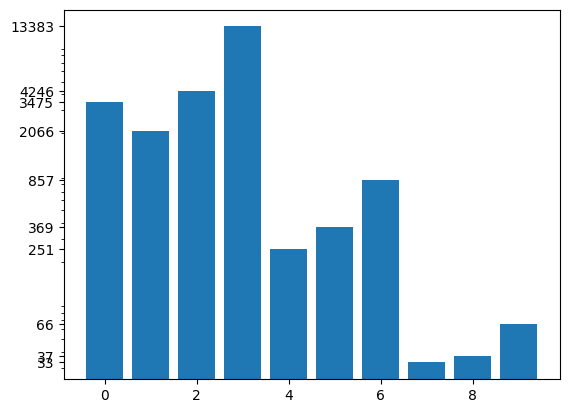

In [ ]:
# Extrae los valores y frecuencias para graficarlo
valores = frecuencia_valores2.index
frecuencias = frecuencia_valores2.values

# Crea un histograma para ver la distrubución de los valores
plt.bar(valores, frecuencias)

# Ajusta la escala del eje y a logarítmica para que se muestren todas las barras
plt.yscale('log')

# Configura manualmente las etiquetas del eje y marcando las frecuencias
yticks = frecuencias
yticklabels = [str(val) for val in yticks]
plt.yticks(yticks, yticklabels)

plt.show()

Sin embargo, en la variable "offensive_language_count" tenemos 10 valores únicos y su frecuencia está (más o menos) distribuida.

En esta caso, como se tratan de comentarios que pueden ofender o no (depende del receptor), partiremos por la mitad los comentarios ofensivos o no.

Entonces, de 0-4 serán comentarios no ofensivos y de 5-9 comentarios ofensivos.

In [ ]:
# Sustituir valores en el rango 0 - 1 por 0 y en el rango 2 - 7 por 1 en la columna 'hate_speech_count'
df['hate_speech_count'].loc[df['hate_speech_count'].between(0, 1)] = 0
df['hate_speech_count'].loc[df['hate_speech_count'].between(2, 7)] = 1

<ipython-input-12-08a782775aa3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hate_speech_count'].loc[df['hate_speech_count'].between(0, 1)] = 0
<ipython-input-12-08a782775aa3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hate_speech_count'].loc[df['hate_speech_count'].between(2, 7)] = 1


In [ ]:
# Sustituir valores en el rango 0 - 4 por 0 y en el rango 5 - 9 por 1 en la columna 'offensive_language_count'
df['offensive_language_count'].loc[df['offensive_language_count'].between(0, 4)] = 0
df['offensive_language_count'].loc[df['offensive_language_count'].between(5, 9)] = 1

<ipython-input-13-af9a0929ad51>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['offensive_language_count'].loc[df['offensive_language_count'].between(0, 4)] = 0
<ipython-input-13-af9a0929ad51>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['offensive_language_count'].loc[df['offensive_language_count'].between(5, 9)] = 1


Eliminamos la columna de tweet para no crear confusión

In [ ]:
# Eliminar la columna 'tweets'
df.drop('tweet', axis=1, inplace=True)

In [ ]:
# Cambiar el nombre de la columna 'processed_tweet' a 'tweet'
df.rename(columns={'processed_tweet': 'tweet'}, inplace=True)

In [ ]:
import numpy as np
# Compara las columnas y crea la nueva columna 'etiquetas'
df['etiquetas'] = np.where(df['hate_speech_count'] == df['offensive_language_count'],
                           df['hate_speech_count'], 1)

Comparamos las columnas de **hate_speech_count** y **offensive_language_count** de forma que si alguna de las variables o las dos estan clasificadas en 1, en la nueva etiqueta se pondrá un 1 clasificandolo como discurso de odio y en caso contrario se asignará un 0.

Ahora, queremos visualizar los datos de **hate_speech_count** y **offensive_language_count** para saber la distribución de los que sean  0 (no discurso de odio) y los que sean 1 (discurso de odio) que se presenta en la base de datos.

Para ello, vamos a utilizar dos tipos de gráficas: gráfica de barras y una gráfica de tipo pastel.

In [ ]:
df

,count,hate_speech_count,offensive_language_count,neither_count,class,tweet,etiquetas
0,3,0,0,3,2,woman complain cleaning house amp man always t...,0
1,3,0,0,0,1,boy dat cold tyga dwn bad cuffin dat hoe 1st p...,0
2,3,0,0,0,1,dawg rt ever fuck bitch start cry confused shit,0
3,3,0,0,1,1,look like tranny,0
4,6,0,1,0,1,shit hear might true might faker bitch told ya...,1
...,...,...,...,...,...,...,...
24778,3,0,0,1,1,muthaf lie 8220 right tl trash 8230 mine bible...,0
24779,3,0,0,2,2,gone broke wrong heart baby drove redneck crazy,0
24780,3,0,0,0,1,young buck wan na eat dat nigguh like aint fuc...,0
24781,6,0,1,0,1,youu got wild bitch tellin lie,1


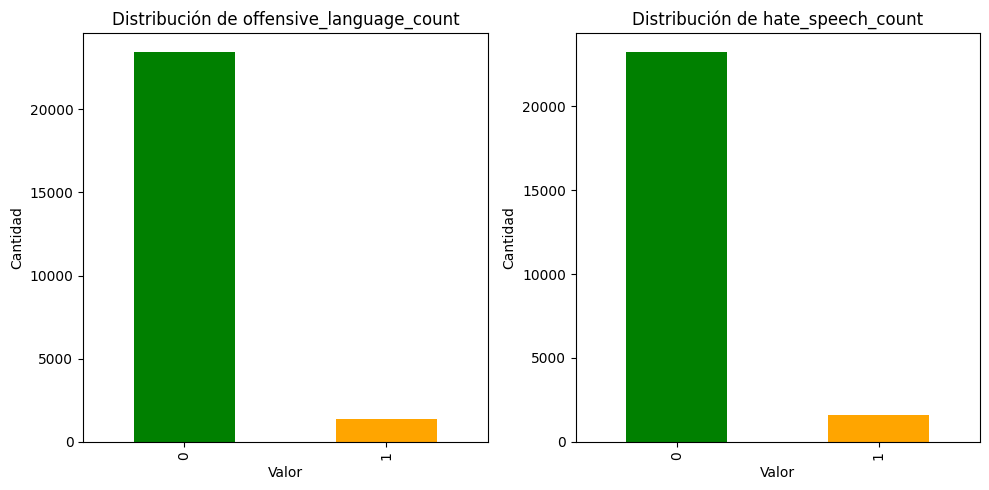

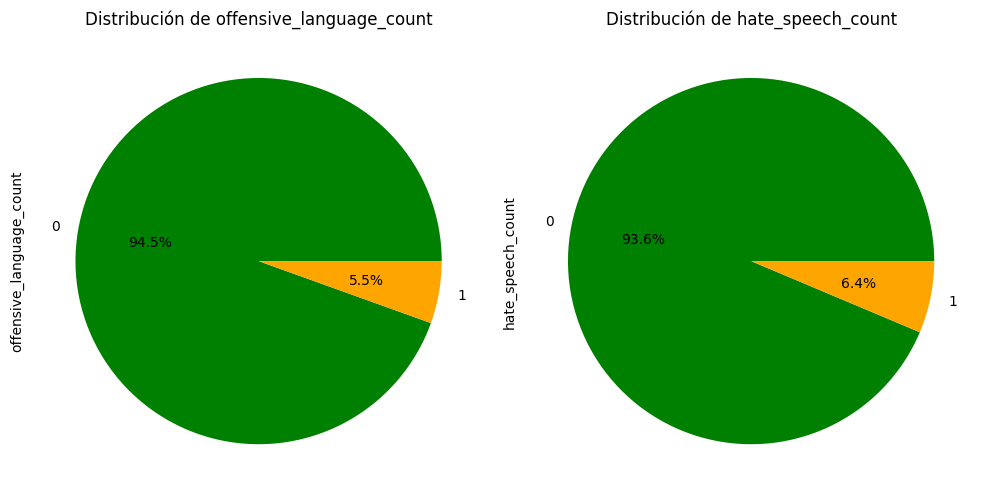

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


# Gráfico de barras
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
df['offensive_language_count'].value_counts().sort_index().plot(kind='bar', color=['green', 'orange'])
plt.title('Distribución de offensive_language_count')
plt.xlabel('Valor')
plt.ylabel('Cantidad')

plt.subplot(1, 2, 2)
df['hate_speech_count'].value_counts().sort_index().plot(kind='bar', color=['green', 'orange'])
plt.title('Distribución de hate_speech_count')
plt.xlabel('Valor')
plt.ylabel('Cantidad')

plt.tight_layout()
plt.show()

# Gráfico de pastel (pie chart)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
df['offensive_language_count'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['green', 'orange'])
plt.title('Distribución de offensive_language_count')

plt.subplot(1, 2, 2)
df['hate_speech_count'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['green', 'orange'])
plt.title('Distribución de hate_speech_count')

plt.tight_layout()
plt.show()

In [ ]:
tweet = list(df['tweet'])
labels = list(df['etiquetas'])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tweet, labels, test_size=0.2, random_state=42)

In [ ]:
X_train[0]

'well else white ppl get u forget horrific past paint pretty picture ho 8230'

Para convertir los comentarios de los tweets (que generalmente son texto) en vectores de números para alimentarlos a una red neuronal, podemos utilizar técnicas de procesamiento de lenguaje natural (PLN) como la tokenización y la representación vectorial de palabras.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
# Supongamos que X_train es una lista de comentarios de tweets
# Usar Tokenizer de Keras para tokenizar y convertir el texto en secuencias de números
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
# Tokenize the train and test dataset
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [ ]:
print(X_test[0])

[8, 1415, 65, 27, 1]


In [ ]:
print(X_train[0])

[141, 411, 55, 489, 10, 11, 570, 7835, 704, 1443, 236, 303, 132, 18]


Este código calcula el tamaño del vocabulario, es decir, el número total de palabras únicas presentes en los datos de entrenamiento:

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

16817


In [ ]:
## Padding -> to uniform the datas
max_length = max(len(seq) for seq in X_train)
# to test an outlier case (if one of the test dataset has longer length)
for x in X_test:
    if len(x) > max_length:
        print(f"an outlier detected: {x}")

X_train = pad_sequences(X_train, maxlen = max_length)
X_test = pad_sequences(X_test, maxlen = max_length)

an outlier detected: [21, 34, 23, 712, 1856, 1, 1555, 1555, 1555, 1555, 1555, 1555, 1555, 1555, 1555, 1555, 1555, 1555, 1555, 1555, 1555, 1555, 1555, 1555, 1555, 1555, 1555, 1555, 1555, 1555, 1555, 1555, 1555, 1555, 1555, 1555, 1555, 1555, 1555, 1555, 1555, 1555, 1555, 1555, 1555, 1555, 1555, 1555, 1555, 1555, 1555, 1555, 1555, 1555, 1555, 1555, 1555, 1555, 1555, 1555, 1555, 1555, 1555, 1555, 1555, 1555, 1555, 1555, 1555, 1555, 1555, 1555, 1555, 1555, 1555, 1555, 1555, 1555, 1555, 1555, 1555, 18]
an outlier detected: [787, 176, 3308, 3308, 3308, 3308, 3308, 3308, 3308, 3308, 3308, 3308, 3308, 3308, 3308, 3308, 3308, 3308, 3308, 3308, 3308, 3308, 3308, 3308, 3308, 3308, 3308, 3308, 3308, 3308, 3308, 3308, 3308, 3308, 3308, 3308, 3308, 3308, 3308, 3308, 3308, 3308, 3308, 3308, 3308, 3308, 3308, 3308, 3308, 3308, 3308, 3308, 3308, 3308, 3308, 3308, 3308, 3308, 3308, 3308, 3308, 3308, 3308, 3308, 3308, 3308, 3308, 97, 61, 176, 45, 213, 1, 9]


## **Construcción de la red**

In [ ]:
from tensorflow.keras import models, layers
from tensorflow.keras.utils import plot_model

model = models.Sequential()
# Entrada, un tensor con la crítica vectorizada (max_length valores)
model.add(layers.Dense(8, activation='relu', input_shape=(max_length,)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
from tensorflow.keras import optimizers
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

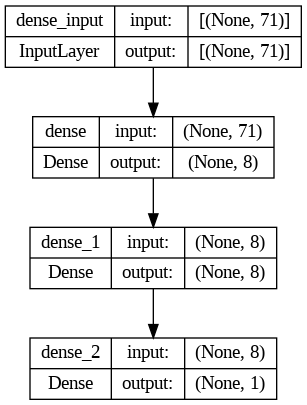

In [ ]:
from keras import losses
from keras import metrics
model.compile(optimizer=optimizers.RMSprop(learning_rate=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

A continuación realizaremos una explicación detallada de la construcción de la arquitectura de nuestra red:

- Inicializamos el modelo con "**model = models.Sequential()**", que crea un modelo secuencial en Keras. Los modelos secuenciales son una pila lineal de capas donde cada capa tiene exactamente un tensor de entrada y uno de salida.

- Agregamos capas al modelo con "**model.add(layers.Dense(8, activation='relu', input_shape=(max_length,)))**", que añade una capa densamente conectada (también conocida como capa completamente conectada) al modelo. La capa tiene 8 neuronas y utiliza la función de activación ReLU (Rectified Linear Unit). El parámetro "**input_shape**" define la forma del tensor de entrada y "**max_length**" es la longitud del vector de entrada.
Como se puede apreciar contamos con dos capas de este tipo. Por último,"**model.add(layers.Dense(1, activation='sigmoid'))**" es la capa de salida. Contiene una sola neurona y utiliza la función de activación sigmoide. Dicha función es adecuada para problemas de clasificación binaria.

- Compilamos el modelo con "**model.compile(...)**". Esta función se encarga de configurar el modelo para el entrenamiento. Se realizan varias llamadas a "**model.compile**", pero es la última la que tiene efecto. El optimizador es "**optimizer='rmsprop'**", que define el optimizador RMSprop con una tasa de aprendizaje de 0.001. Para la función de perdida "**loss='binary_crossentropy**" establece la función de pérdida para la clasificación binaria. "Binary crossentropy" es una elección común para problemas de clasificación binaria.

- Finalmente empleamos "**plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)**" para visualizar la arquitectura de la red.




## **Validar nuestra aproximación**

In [ ]:
x_val = X_train[:2500]
partial_x_train = X_train[2500:]

y_val = y_train[:2500]
partial_y_train = y_train[2500:]

In [ ]:
import numpy as np
x_val = np.array(x_val)
y_val = np.array(y_val)
partial_x_train = np.array(partial_x_train)
partial_y_train = np.array(partial_y_train)

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=64,
                    validation_data=(x_val, y_val))

Epoch 1/20
271/271 [==============================] - 2s 4ms/step - loss: 15.0054 - acc: 0.7894 - val_loss: 4.0449 - val_acc: 0.7816
Epoch 2/20
271/271 [==============================] - 1s 3ms/step - loss: 3.3547 - acc: 0.8186 - val_loss: 1.5792 - val_acc: 0.8112
Epoch 3/20
271/271 [==============================] - 1s 3ms/step - loss: 1.3464 - acc: 0.8459 - val_loss: 0.7168 - val_acc: 0.8724
Epoch 4/20
271/271 [==============================] - 1s 3ms/step - loss: 0.7616 - acc: 0.8582 - val_loss: 0.5628 - val_acc: 0.8612
Epoch 5/20
271/271 [==============================] - 1s 2ms/step - loss: 0.5646 - acc: 0.8644 - val_loss: 0.4963 - val_acc: 0.8388
Epoch 6/20
271/271 [==============================] - 1s 3ms/step - loss: 0.4928 - acc: 0.8696 - val_loss: 0.4179 - val_acc: 0.8784
Epoch 7/20
271/271 [==============================] - 1s 3ms/step - loss: 0.4404 - acc: 0.8741 - val_loss: 0.4017 - val_acc: 0.8792
Epoch 8/20
271/271 [==============================] - 1s 4ms/step - loss: 0

En esta sección comenzamos dividiendo los datos es dos lotes: el lote de entrenamiento y el lote de validación.

- El fragmento "**x_val = X_train[:2500] y y_val = y_train[:2500]**" separa los primeros 2500 ejemplos del conjunto de entrenamiento **X_train** y sus correspondientes etiquetas **y_train** y los asignan a **x_val** y **y_val**, respectivamente. Es decir, estos serán utilizados como datos de validación.

- "**partial_x_train = X_train[2500:] y partial_y_train = y_train[2500:]**" toma el resto de los datos del conjunto de entrenamiento y los asignan a **partial_x_train** y **partial_y_train**; que serán utilizados para el entrenamiento del modelo.

La siguiente celda de nuestro código se encarga de transformar los datos a "Arrays de NumPy", puesto que es el formato de datos preferido para entrenar modelos en Keras.

A continuación compilamos el modelo empleando la configuracción previamente mencionada (**model.compile(...)**,
**optimizer='rmsprop'**,
**loss='binary_crossentropy'**,
**metrics=['acc']**).

Por último se realiza el entrenamiento de nuestro modelo:

- Iniciamos el proceso de entrenamiento del modelo con los datos proporcionados empleando **"history = model.fit(...)**" .


- Como mencionamos anteriormente, **partial_x_train** y **partial_y_train** son los datos y etiquetas de entrenamiento, respectivamente.

- El modelo se entrenará durante 20 "epochs" (**epochs=20** ) siendo cada "epoch" es una iteración sobre todo el conjunto de datos de entrenamiento.
- Los datos se pasarán al modelo en lotes (batches) de 64 ejemplos a la vez(**batch_size=64**).

- A su vez el modelo también será evaluado en el conjunto de validación que hemos separado previamente (**validation_data=(x_val, y_val)**).

* La llamada a ``model.fit()`` devuelve un objeto ``History``. Este objeto tiene un **atributo ``history``**, que es un **diccionario** que contiene datos sobre **todo lo que sucedió durante el entrenamiento**.

Como se puede apreciar, el modelo logra una precisión del 88,12% en la "epoch" 11. Tras realizar varias pruebas podemos afirmar que ese es el límite de precisión al que puede llegar dada la configuración actual; y este se suele alzanzar entre las "epochs" 5 y 15 dependiendo de la inicialización aleatoria de los pesos

In [ ]:
history_dict = history.history
history_dict.keys()
print(history_dict['loss'])
print(history_dict['acc'])
print(history_dict['val_loss'])
print(history_dict['val_acc'])

[15.005414009094238, 3.3547070026397705, 1.3464124202728271, 0.7615824341773987, 0.5646205544471741, 0.49283894896507263, 0.4404408633708954, 0.4261004626750946, 0.4208817481994629, 0.41027987003326416, 0.3936164379119873, 0.3884146213531494, 0.37971463799476624, 0.37502989172935486, 0.3723832070827484, 0.37543225288391113, 0.37652575969696045, 0.3721844553947449, 0.37300798296928406, 0.3771885931491852]
[0.7894493937492371, 0.8185963034629822, 0.8458963632583618, 0.8581900000572205, 0.864423394203186, 0.869560182094574, 0.8741198182106018, 0.8749855756759644, 0.876082181930542, 0.8774673938751221, 0.8780445456504822, 0.8804686665534973, 0.8806418180465698, 0.881565272808075, 0.881565272808075, 0.8816807270050049, 0.8816807270050049, 0.8812766671180725, 0.88191157579422, 0.8816807270050049]
[4.044864654541016, 1.5791583061218262, 0.7168091535568237, 0.5628424286842346, 0.4963286221027374, 0.417878121137619, 0.401676207780838, 0.40242013335227966, 0.3870336413383484, 0.3805087208747864,

* El diccionario contiene 4 entradas: una por métrica que se estaba monitorizando durante el entrenamiento y durante la validación.
* Usaremos **Matplotlib** para graficar la **pérdida** de **entrenamiento** y la de **validación** una al lado de otra, así como la **precisión** de **entrenamiento** y **validación**:
* Las posibles diferencias entre una ejecución y otra es debida a la inicialización aleatoria de los pesos

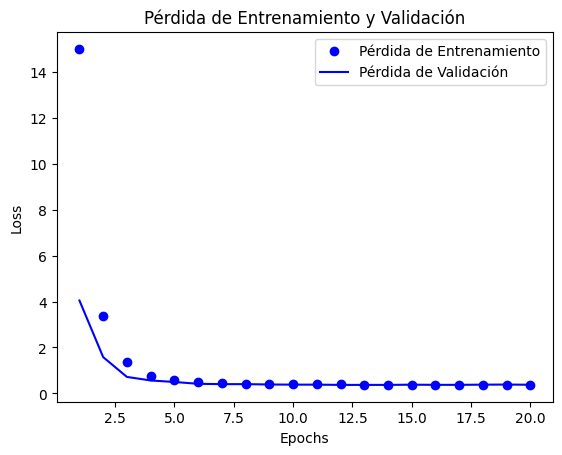

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" es para "punto azul"
plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
# "b" es para "linea continua azul"
plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
plt.title('Pérdida de Entrenamiento y Validación')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Tras importar la librería correspondiente (**"import matplotlib.pyplot as plt**"), extraemos los datos obtenidos del "history" para obtener la pérdida y la precisión del modelo en cada época (**acc = history.history['acc'] y val_acc = history.history['val_acc'], loss = history.history['loss'] y val_loss = history.history['val_loss']**). Tras crear una secuencia de números que representan cada época empleando "**epochs = range(1, len(acc) + 1)**" creamos un gráfico de la pérdida de entrenamiento (loss) para cada época (**plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')**). Se representa mediante puntos azules. Para finalizar la gráfica, se establecen las etiquetas, la leyenda y el titulo correspondientes (**plt.xlabel('Epochs'), plt.ylabel('Loss'), plt.legend(),lt.title('Pérdida de Entrenamiento y Validación')**) y se imprime con **plt.show()**.

En nuestra gráfica se puede apreciar que la progresión de la perdida es muy estable y ,asimismo, se ajusta a lo que esperabamos de este modelo. Los valores de perdida más bajos se encuentran en la perdida de validación, lo cual es un indicador de que no se ha producido sobreentrenamiento. Otro indicador de ello es, como se puede observar de forma gráfica, que la perdida de entrenamiento es pareja a la de validación a lo largo de todas las iteraciones y mantiene una tendecia estable. Esto es un claro indicador de que se mantiene la generalidad del sistema tras el entrenamiento, pues obtiene los mismos resultados para un lote diferente de datos.

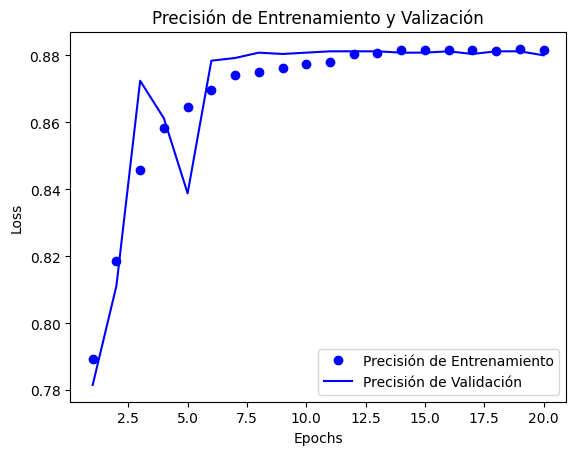

In [ ]:
plt.clf()   # Limpia la figura
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Precisión de Entrenamiento')
plt.plot(epochs, val_acc, 'b', label='Precisión de Validación')
plt.title('Precisión de Entrenamiento y Valización')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Continuando con la evaluación gráfica del rendimiento de nuestro modelo, ahora nos enfocamos en la precisión, que es la otra métrica clave para entender cómo está funcionando la arquitectura. Primero, limpiamos la figura anterior con plt.clf(), lo que nos permite empezar con un lienzo limpio para la nueva visualización.

A continuación, realizamos el mismo proceso para los valores de precisión de entrenamiento y validación (**acc_values = history_dict['acc'] y val_acc_values = history_dict['val_acc']**), modificando solamente el contenido de las etiquetas para cambiar la palabra "perdida" por "precisión"(**plt.plot(epochs, acc, 'bo', label='Precisión de Entrenamiento')) (plt.plot(epochs, val_acc, 'b', label='Precisión de Validación'))**).

Aunque para esta métrica la gráfica también muestra resultados bastante satisfactorios, hay algunos aspectos que hacen que los resultados sean ligeramente peores a los de la pérdida.

En primer lugar se puede apreciar un "pico" muy pronunciado en la precisión de validación en la "epoch" 5 (aunque la variación real no es muy grande, en un modelo tan constante es bastante notable), lo cual indica, con bastante probabilidad, que el sistema ha pasado por alto un mínimo local.

También se puede observar un ligero sobreentrenamiento, pues la precisión de validación más alta que alcanza el modelo es 0.8812 mientras que para la precisión de entrenamiento es 0.8819. Aunque tan solo se trata de una diferencia centesimal, podemos afirmar que es sobreentrenamiento pues a lo largo de las diferentes pruebas la precisión de validación nunca ha superado dicho valor. Por lo tanto, podemos asumir que el modelo ha logrado "acostumbrarse" a ciertos criterios del lote de entrenamiento, perdiendo un poco de generalidad que le permite alcanzar esa escasa cantidad de precisión añadida para el lote de entrenamiento.

Aun con todo, la tendencia de la gráfica es muy estable y constante; alcanzando una precisión de clasificación del 88,12%.

# Proceso del trabajo

La primera decisión y la más determinante del trabajo consistió en determinar el corte en el número de anotaciones de las variables "offensive_language_count" y "hate_speech_count".

De primeras, determinamos dicho "corte" de la siguiente forma:

  - En la variable "hate_speech_count", establecimos que las anotaciones que varían de 0 a 1 se clasificarian como 0, indicando la ausencia de discurso de odio. En contraste, las anotaciones que cayesen en el rango de 2 a 7 se designarian como 1, lo que implica que el tweet ha sido clasificado como contenido de discurso de odio.

  - En el contexto de la variable "offensive_language_count", se tomó la decisión de que un tweet no sería clasificado como discurso de odio si las anotaciones realizadas caían en el rango de 0 - 4. En contraste, se estableció que las anotaciones en el rango de 5 - 9 indicarían que el tweet debería ser clasificado como discurso de odio. Esta determinación se aplicó anteriormente como parte de un proceso de revisión.

Sin embargo, queríamos comprobar que nuestra clasificación según las anotaciones en las variables fuese correcta, para ello nos adentramos en la base de datos y leímos algunos tweets y comprobamos si la clasificación era correcta en la columna de etiquetas.

Para nuestra sorpresa había algunos tweets que nos parecían bastante ofensivos y, sin embargo, no estaban clasificados como discurso de odio.

Por lo que, decidimos cambiar los rangos de nuevo.

Determinamos el nuevo "corte" de la siguiente forma:

  - En la variable "hate_speech_count", se estableció que las anotaciones con valor igual a 0 serían asignadas como 0, indicando la ausencia de discurso de odio. En contraste, se decidió que las anotaciones en el rango de 1 - 7 se asignarían como 1, clasificando así al tweet como contenido de discurso de odio. Esta determinación fue aplicada en una revisión previa del proceso.

  - Para la varieble "offensive_language_count", se tomó la decisión de que un tweet no sería clasificado como discurso de odio si las anotaciones realizadas caían en el rango de 0 - 3. En contraste, se determinó que las anotaciones en el rango de 4 - 9 indicarían que el tweet debería ser clasificado como discurso de odio. Esta determinación fue aplicada en una revisión previa del proceso.

Realizamos la construcción de la red neuronal y el correspondiente entrenamiento. La precisión con el primer intervalo de los datos alcanzaba 0.8,
sin embargo al usar el segundo intervalo la precisión bajó a 0.39, el cual es un valor bastante pequeño teniendo en cuenta el tipo de problema con el que estamos tratando; por lo que dejamos el primer intervalo.

Tras selecionar el intervalo de los datos nos andentramos en la arquitectura de res. Este primer modelo constaba de dos capas densamente conectadas con 16 neuronas cada una y una tercera capa de salida con función de activación sigmoidea. El entrenamiento se realizaba en lotes de 512 muestras durante 20 etapas y con una tasa de aprendizaje de 0.001. A pesar de que la precisión de este modelo era bastante alta, presentaba resultados algo inconsistentes con fluctuaciones en los valores de las métricas, sobreentrenamiento, muchos picos en las gráficas... etc

Tratando de optimizar el modelo llevamos a cabo muchas modificaciones en los hiperparámetros para mejorar el rendimiento, sin embargo, la mayoría de modificaciones en dichos parametros no tenían el impacto esperado en los resultados finales. Esto contrasta con experiencias de prácticas anteriores con otros modelos, en los que el ajuste de hiperparámetros inducían cambios más significativos. Entre los ajustes hiperparamétricos que no han producido los efectos esperados se incluyen la tasa de aprendizaje, el número de capas en la arquitectura de la red y el compilador; los cuales optamos finalmente por dejar igual para todas las pruebas.

Finalmente, mediante un proceso de prueba-error llegamos a la configuración actual de nuestra arquitectura, que es la que nos ha dado mejores resultados. Como ha sido detallado anteriormente, nuestro modelo es bastante sencillo, pues consta  de dos capas densamente conectadas con 8 neuronas cada una y una tercera capa de salida con función de activación sigmoidea.
Los ajustes del entrenamiento también son bastante estándar, teniendo 20 "epochs" (epochs=20) en lotes de 64 muestras (batch_size=64).
                   

# Conclusiones

Nos gustaría finalizar esta práctica recapitulando algunas de las impresiones que nos han surgido a lo largo del desarrollo.

En primer lugar, puesto que no se trata de un problema muy complejo a nivel computacional debido al tipo y volumen de datos, hemos llegado a una apreciación: “a veces menos es más”. Al tener una cantidad de datos limitada, el emplear una arquitectura más grande y compleja puede no solo suponer un gasto mayor de recursos y tiempo para entrenarse adecuadamente, si no que además puede generar una peor generalización y problemas de sobreentrenamiento. Por lo que en ocasiones una arquitectura más modesta converge más rápido y es más eficiente


 Otro de los puntos más relevantes, es la importancia del preprocesamiento de los datos. En este caso, la forma en la que son seleccionados los datos y cómo se establecen los intervalos afecta en gran manera al resultado final del modelo. Esto se hizo evidente  cuando al modificar el intervalo seleccionado la precisión de clasificación aumentó de 0.39 a 0.80.

Por último, creemos firmemente que la realización de modelos que resuelven problemas de esta índole es uno de los mejores usos que se le puede dar a las redes neuronales hoy en día. Aunque somos conscientes del problema que supone equilibrar efectivamente la censura con la libertad de expresión, es necesario desarrollar este tipo de herramientas con la necesidad de proteger a los individuos del ciberacoso. Por lo tanto, hemos quedado bastante satisfechos con el modelo desarrollado, pues es capaz de percibir si el texto procesado se trata de un discurso de odio  o no con hasta un 88.12% de precisión, lo cual es un resultado bastante satisfactorio.
